# 📘 Преобразование временных рядов для стационарности

---

## 🧾 Обзор

При анализе временных рядов важно привести их к **стационарному виду** — когда математическое ожидание, дисперсия и автокорреляционная структура не меняются во времени.

---

## 🔹 1. Выбросы (аномальные значения)

**Признаки:**
- Резкие пики или провалы
- Нарушение нормальности
- Искажение модели при обучении

**Методы устранения:**
- Экспоненциальное сглаживание
- Winsorizing (обрезка хвостов)
- Z-оценка, IQR — для детекции
- Медианное сглаживание
- Робастные модели

**Возможные проблемы:**
- Удаление важных реальных событий (например, кризисов)

---

## 🔹 2. Тренд (направленность во времени)

**Признаки:**
- Долгосрочный рост или падение
- Невыраженное колебание вокруг средней линии

**Методы устранения:**
- Дифференцирование (первая/вторая разность)
- Регрессия на тренд
- STL-декомпозиция (тренд + сезонность + остатки)
- Преобразование Бокса-Кокса
- Модель Холта (экспоненциальное сглаживание с трендом)

**Возможные проблемы:**
- Потеря информации
- Ошибки в трактовке модели после дифференцирования

---

## 🔹 3. Сезонность

**Признаки:**
- Повторяющиеся колебания с постоянным периодом
- Явные пики/спады по временам года, месяцам и т.д.

**Методы устранения:**
- Сезонное дифференцирование: `y_t - y_{t-s}`
- STL-декомпозиция
- Модель Хольта-Винтерса
- Dummy-переменные
- Скользящие средние с сезонным окном

**Возможные проблемы:**
- Изменяющаяся сезонность
- Пропущенные периоды разрушают структуру

---

## 🔹 4. Нестационарность

**Признаки:**
- Среднее и/или дисперсия меняются со временем
- ACF/PACF не затухают
- ADF/KPSS/PP — указывают на нестационарность

**Методы устранения:**
- Дифференцирование
- Логарифмирование
- Преобразование Бокса–Кокса
- Удаление тренда/сезонности

**Проверка стационарности:**
- ADF (Augmented Dickey-Fuller)
- KPSS
- Phillips-Perron

**Проблемы:**
- Переобработка делает ряд слишком шумным
- Потеря экономического смысла

---

## 🔹 5. Гетероскедастичность (изменяющаяся дисперсия)

**Признаки:**
- «Веерообразное» расширение графика
- Ошибки моделей в виде нестабильной дисперсии

**Методы устранения:**
- Логарифмирование
- Корень квадратный
- Преобразование Бокса–Кокса
- ARCH/GARCH (если дисперсия важна)

**Проблемы:**
- Логарифм не применяется к нулевым и отрицательным значениям
- Изменяется структура данных

---

## 🔹 6. Пропущенные значения / неравномерность

**Признаки:**
- Отсутствие данных или неровный временной шаг

**Методы устранения:**
- Интерполяция (линейная, сплайн, локально-взвешенная)
- Заполнение предыдущим значением (LOCF)
- Удаление строк
- Прогнозирование пропущенного

**Проблемы:**
- Ошибочная интерполяция может нарушить структуру
- Слишком много пропусков — повод отказаться от ряда

---

## 🔹 7. Автокорреляция ошибок

**Признаки:**
- Остатки модели зависимы во времени
- ACF/PACF остатков не равны нулю

**Методы устранения:**
- Добавление AR и MA компонент
- Увеличение порядка модели
- Использование GLS или ARIMA

**Проблемы:**
- Сложность выбора порядка
- Переобучение на тренировочных данных

---

## 📌 Часто используемые инструменты и тесты

| Задача                        | Метод                         |
|------------------------------|-------------------------------|
| Проверка стационарности      | ADF, KPSS, PP                 |
| Проверка сезонности          | ACF/PACF, STL, спектр. анализ |
| Прогнозирование              | ARIMA, Holt-Winters, Prophet  |
| Стабилизация дисперсии       | Логарифм, Box-Cox             |
| Выделение тренда             | Регрессия, STL, скольз. средн.|

---

## 📊 Пример типичной последовательности преобразований


Исходный ряд →

→ Логарифмирование

→ Сезонное дифференцирование

→ Первая разность

→ Проверка ADF

→ Построение модели (ARIMA/ETS и т.д.)


---

*Глоссарий*:

• *ADF* — Augmented Dickey-Fuller Test

• *KPSS* — Kwiatkowski-Phillips-Schmidt-Shin Test

• *STL* — Seasonal and Trend decomposition using Loess

• *Box-Cox* — параметрическое преобразование для стабилизации дисперсии

• *ARIMA* — Autoregressive Integrated Moving Average

• *ARCH/GARCH* — модели условной гетероскедастичности



## Game online set

In [ ]:
!pip install numpy==1.23.5
!pip install pmdarima==2.0.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.3 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller, kpss
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hour_online (1).csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2625 entries, 0 to 2624
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    2625 non-null   object
 1   Users   2625 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 41.1+ KB


In [ ]:
# Преобразование и сортировка по времени
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)
df = df.sort_index()

# Восстановление полного временного диапазона (с шагом 1 час)
full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')
df = df.reindex(full_range)

# Интерполяция пропущенных значений
df['Users'] = df['Users'].interpolate(method='linear')

# Проверка пропусков
print(df.isna().sum())

Users    0
dtype: int64


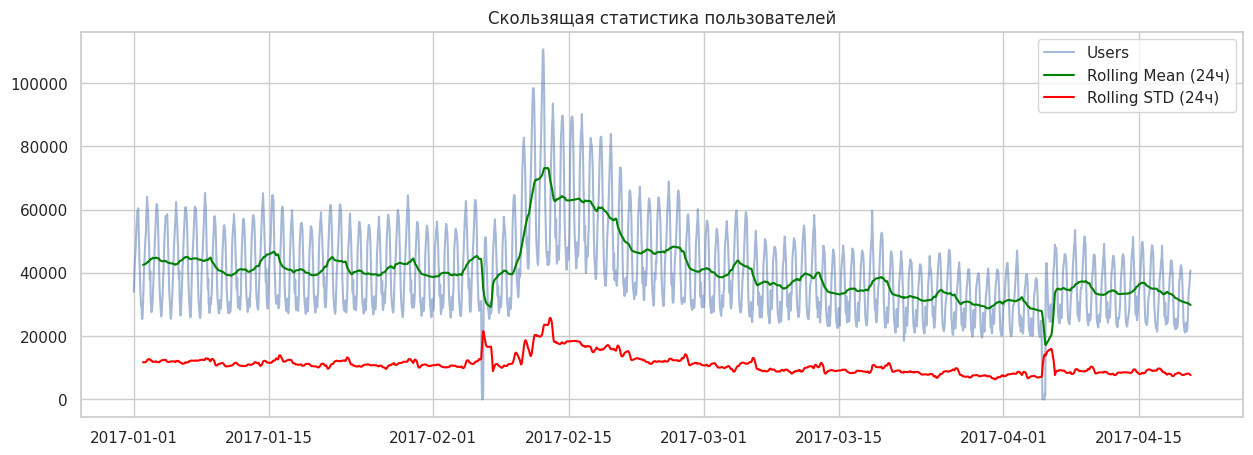

In [ ]:
df['rolling_mean'] = df['Users'].rolling(window=24).mean()
df['rolling_std'] = df['Users'].rolling(window=24).std()

plt.figure(figsize=(15, 5))
plt.plot(df['Users'], label='Users', alpha=0.5)
plt.plot(df['rolling_mean'], label='Rolling Mean (24ч)', color='green')
plt.plot(df['rolling_std'], label='Rolling STD (24ч)', color='red')
plt.title('Скользящая статистика пользователей')
plt.legend()
plt.show()

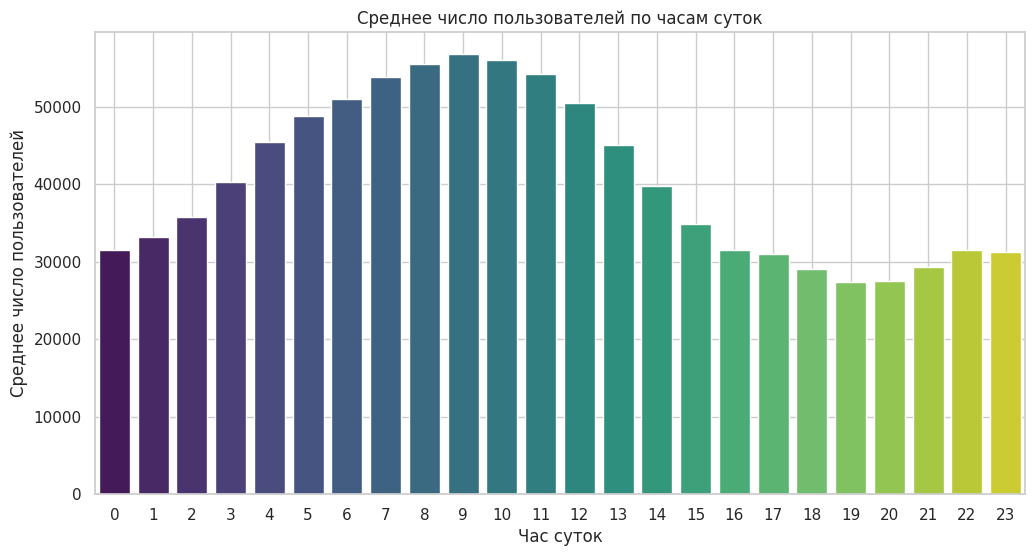

In [ ]:
df['hour'] = df.index.hour
hourly_avg = df.groupby('hour')['Users'].mean()

plt.figure()
sns.barplot(x=hourly_avg.index, y=hourly_avg.values, palette='viridis')
plt.title('Среднее число пользователей по часам суток')
plt.xlabel('Час суток')
plt.ylabel('Среднее число пользователей')
plt.grid(True)
plt.show()

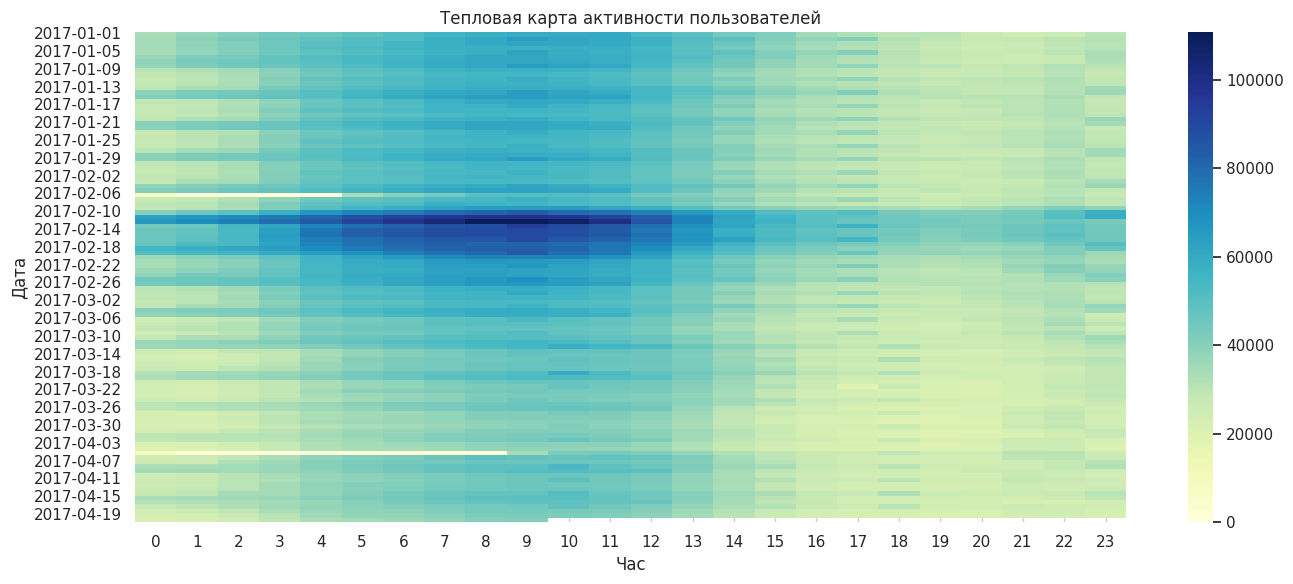

In [ ]:
df['date_only'] = df.index.date
pivot = df.pivot_table(index='date_only', columns='hour', values='Users')

plt.figure(figsize=(14, 6))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Тепловая карта активности пользователей')
plt.xlabel('Час')
plt.ylabel('Дата')
plt.tight_layout()
plt.show()

In [ ]:
df['Users_diff'] = df['Users'].diff()

# ADF Test
adf_result = adfuller(df['Users_diff'].dropna())
print('\n📉 ADF Test (на разностях):')
print(f'  Статистика: {adf_result[0]:.4f}')
print(f'  p-значение: {adf_result[1]:.4f}')

# KPSS Test
kpss_result = kpss(df['Users_diff'].dropna(), regression='c')
print('\n📈 KPSS Test (на разностях):')
print(f'  Статистика: {kpss_result[0]:.4f}')
print(f'  p-значение: {kpss_result[1]:.4f}')


📉 ADF Test (на разностях):
  Статистика: -11.1297
  p-значение: 0.0000

📈 KPSS Test (на разностях):
  Статистика: 0.0478
  p-значение: 0.1000


In [ ]:
auto_model = auto_arima(df['Users'],
                        start_p=1, start_q=1,
                        max_p=5, max_q=5,
                        d=1,  # одна разность уже сделана
                        seasonal=False,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)

print('\n📘 Автоматически подобранная модель ARIMA:')
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=49235.167, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=50576.019, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=49258.043, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=49671.995, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=50574.020, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=49236.842, Time=2.59 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=49235.869, Time=1.51 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=49501.734, Time=2.68 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=49235.917, Time=2.46 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=49225.710, Time=2.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=49139.146, Time=3.72 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=49204.999, Time=1.19 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=48491.128, Time=11.34 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(5,1,2)(0,0,0)[0] i

                               SARIMAX Results                                
Dep. Variable:                  Users   No. Observations:                 2626
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -24192.225
Date:                Thu, 05 Jun 2025   AIC                          48398.450
Time:                        18:56:20   BIC                          48439.560
Sample:                    01-01-2017   HQIC                         48413.338
                         - 04-20-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6081      0.061     26.205      0.000       1.488       1.728
ar.L2         -0.3938      0.117     -3.358      0.001      -0.624      -0.164
ar.L3         -0.3012      0.060     -5.003      0.0

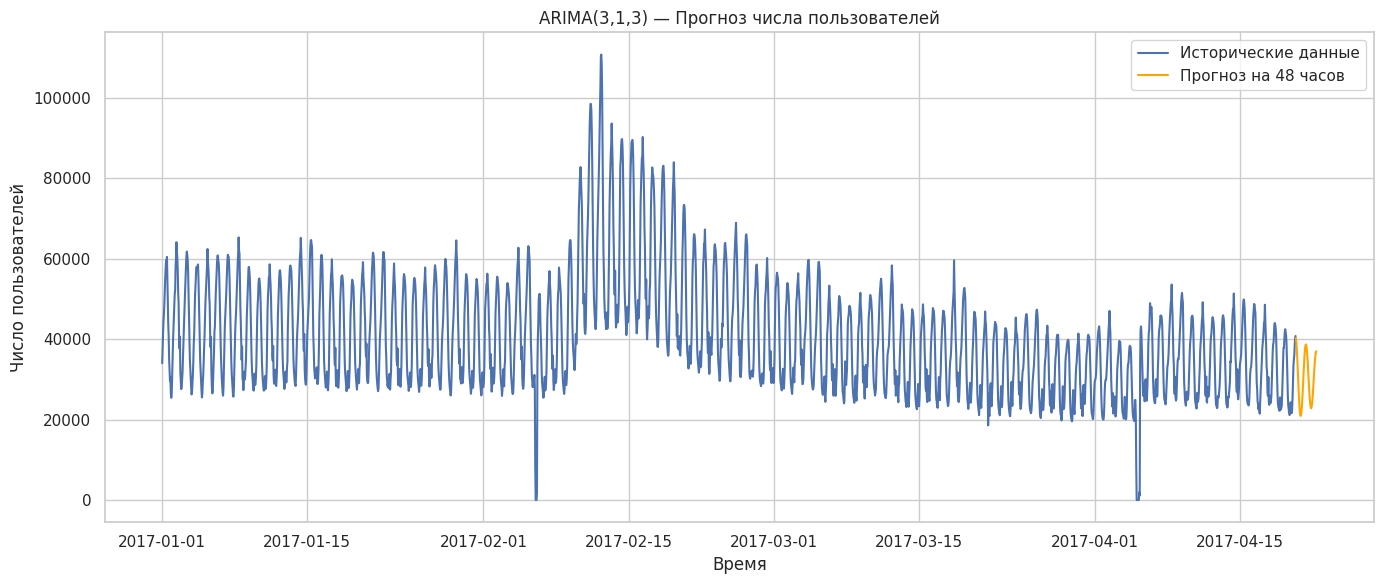

In [ ]:
# Построение ARIMA-модели с параметрами из auto_arima
model = ARIMA(df['Users'], order=(3, 1, 3))  # (p=3, d=1, q=3)
model_fit = model.fit()

# Вывод сводки модели
print(model_fit.summary())

# Прогноз на следующие 48 часов
n_periods = 48
forecast = model_fit.forecast(steps=n_periods)

plt.figure(figsize=(14, 6))
plt.plot(df['Users'], label='Исторические данные')
plt.plot(forecast.index, forecast, label=f'Прогноз на {n_periods} часов', color='orange')
plt.title('ARIMA(3,1,3) — Прогноз числа пользователей')
plt.xlabel('Время')
plt.ylabel('Число пользователей')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## BTC set

In [ ]:
!pip install EMD-signal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: dill
    Found existing installation: dill 0.3.7
    Uninstalling dill-0.3.7:
      Successfully uninstalled dill-0.3.7
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.15
    Uninstalling multiprocess-0.70.15:
      Successfully uninstalled multiprocess-0.70.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 2.14.4 requires dill<0.3.8,>=0.3.0, but you have dill 0.4.0 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from PyEMD import EMD
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

btc = pd.read_excel('/content/drive/MyDrive/bitcoin.xlsx')

In [ ]:
btc

,Дата,Значение
0,2025-06-03,105927.194148
1,2025-06-02,104839.027304
2,2025-06-01,105233.374133
3,2025-05-31,103803.121799
4,2025-05-30,104694.787188
...,...,...
3607,2015-05-10,240.300000
3608,2015-05-09,241.830000
3609,2015-05-08,243.860000
3610,2015-05-07,237.330000


In [ ]:
btc.set_index('Дата', inplace=True)
btc = btc.sort_index()

# Восстановление полного временного диапазона (с шагом 1 час)
full_range = pd.date_range(start=btc.index.min(), end=btc.index.max(), freq='D')
btc = btc.reindex(full_range)

# Проверка пропусков
print(btc.isna().sum())

Значение    70
dtype: int64


In [ ]:
# Интерполяция пропущенных значений
btc['Значение'] = btc['Значение'].interpolate(method='linear')

# Повторная проверка пропусков
print(btc.isna().sum())

Значение    0
dtype: int64


In [ ]:
btc = btc.reset_index()
btc = btc.rename(columns={'index': 'Дата'})

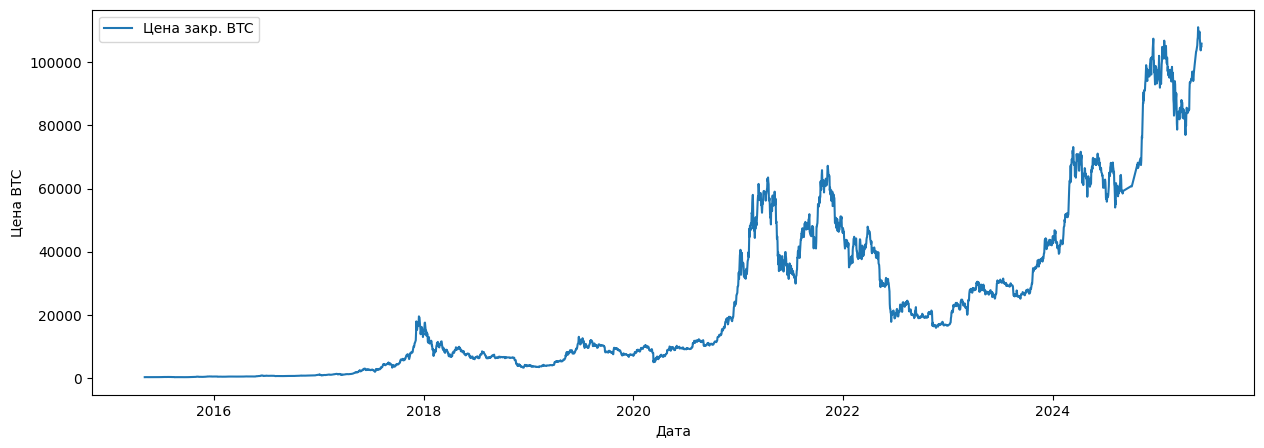

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(btc['Дата'], btc['Значение'], label='Цена закр. BTC')
plt.xlabel('Дата')
plt.ylabel('Цена BTC')
plt.legend()
plt.show()

In [ ]:
btc['ln_значение'] = np.log(btc['Значение'])

In [ ]:
btc['дни'] = (btc['Дата'] - btc['Дата'].min()).dt.days

In [ ]:
коэффициенты = np.polyfit(btc['дни'], btc['ln_значение'], deg=2)
полином = np.poly1d(коэффициенты)

btc['полином'] = полином(btc['дни'])

btc['остаток'] = btc['ln_значение'] - btc['полином']

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

def check_stationarity(series):
    print("ADF Test:")
    adf_result = adfuller(series.dropna())
    print(f"  Statistic: {adf_result[0]:.4f}, p-value: {adf_result[1]:.4f}")
    if adf_result[1] < 0.05:
        print("  => Стационарен по ADF\n")
    else:
        print("  => НЕ стационарен по ADF\n")

    print("KPSS Test:")
    kpss_result = kpss(series.dropna(), regression='c')
    print(f"  Statistic: {kpss_result[0]:.4f}, p-value: {kpss_result[1]:.4f}")
    if kpss_result[1] > 0.05:
        print("  => Стационарен по KPSS\n")
    else:
        print("  => НЕ стационарен по KPSS\n")

check_stationarity(btc['остаток'])

ADF Test:
  Statistic: -2.0645, p-value: 0.2590
  => НЕ стационарен по ADF

KPSS Test:
  Statistic: 0.3217, p-value: 0.1000
  => Стационарен по KPSS



<ipython-input-11-ff7e903bcef2>:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c')


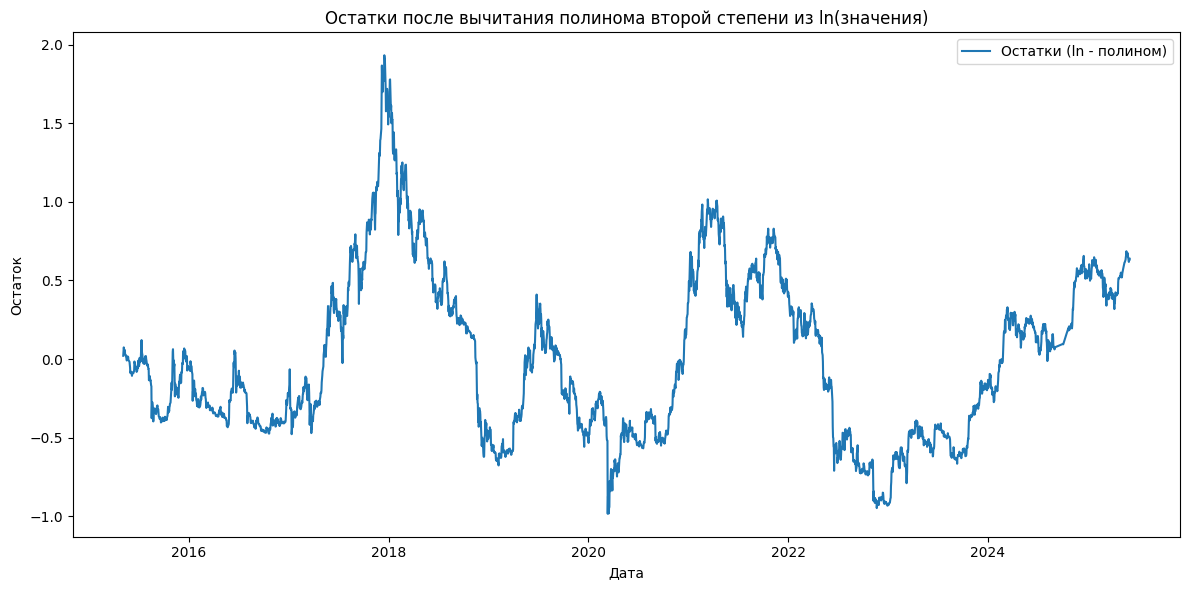

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(btc['Дата'], btc['остаток'], label='Остатки (ln - полином)')
plt.xlabel('Дата')
plt.ylabel('Остаток')
plt.title('Остатки после вычитания полинома второй степени из ln(значения)')
plt.legend()
plt.tight_layout()
plt.show()

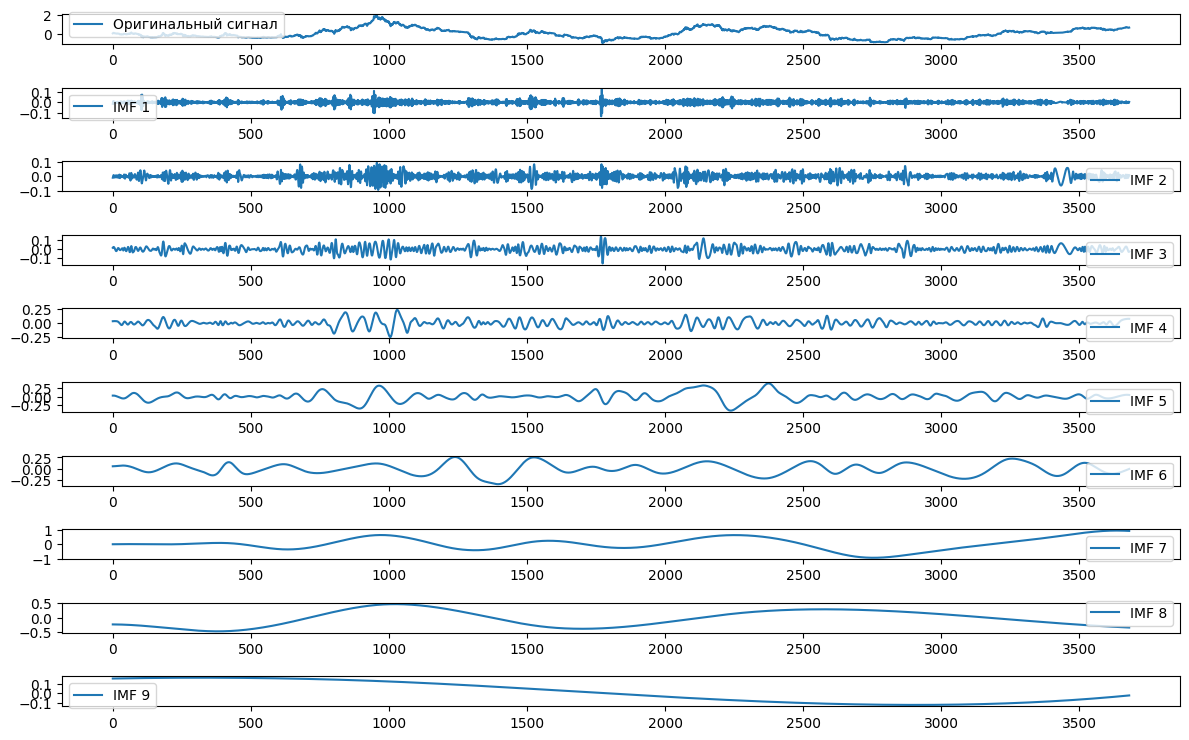

In [ ]:
emd = EMD()
imfs = emd(btc['остаток'].values)

# Визуализация
plt.figure(figsize=(12, 8))
plt.subplot(len(imfs)+2, 1, 1)
plt.plot(btc['остаток'].values, label='Оригинальный сигнал')
plt.legend()

# Все IMFs
for i, imf in enumerate(imfs):
    plt.subplot(len(imfs)+2, 1, i+2)
    plt.plot(imf, label=f'IMF {i+1}')
    plt.legend()

plt.tight_layout()  # Чтобы графики не налезали друг на друга

# Показываем график
plt.show()

In [ ]:
possible_cycle = np.sum(imfs[4:8], axis=0)
possible_cycle = pd.Series(possible_cycle)

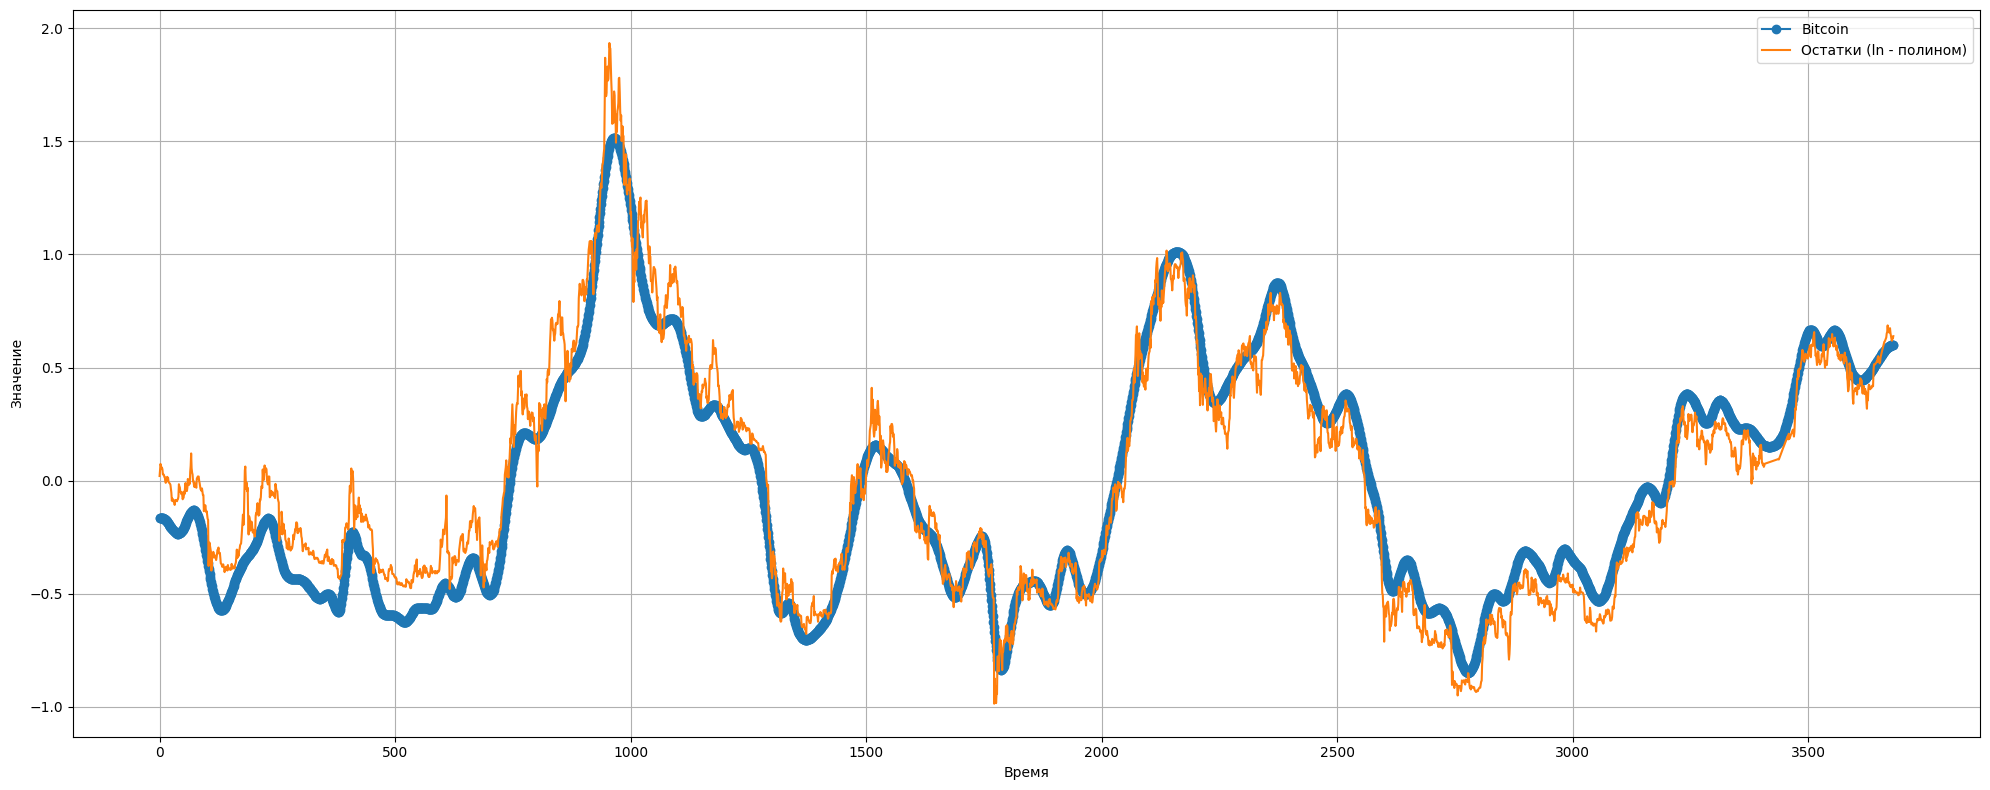

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(possible_cycle, marker='o', label="Bitcoin")
plt.plot(btc['остаток'], label='Остатки (ln - полином)')
plt.xlabel("Время")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

(2282, 1000, 1) (2282, 200, 1)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 53s 399ms/step - loss: 0.0986 - val_loss: 0.0478
Epoch 2/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 82s 397ms/step - loss: 0.0634 - val_loss: 0.0867
Epoch 3/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 82s 396ms/step - loss: 0.0618 - val_loss: 0.0487
Epoch 4/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 82s 398ms/step - loss: 0.0605 - val_loss: 0.0503
Epoch 5/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 81s 393ms/step - loss: 0.0594 - val_loss: 0.0471
Epoch 6/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 83s 403ms/step - loss: 0.0610 - val_loss: 0.0469
Epoch 7/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 82s 401ms/step - loss: 0.0584 - val_loss: 0.0453
Epoch 8/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 82s 398ms/step - loss: 0.0577 - val_loss: 0.0437
Epoch 9/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 82s 399ms/step - loss: 0.0573 - val_loss: 0.0470
Epoch 10/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 82s 400ms/step - loss: 0.0584 - val_loss: 0.0579
Epoch 11/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 82s 399ms/step - loss: 0.0565 - val_loss: 0.0363
Epoch 12/50
129/129 ━━━━━━━━━━

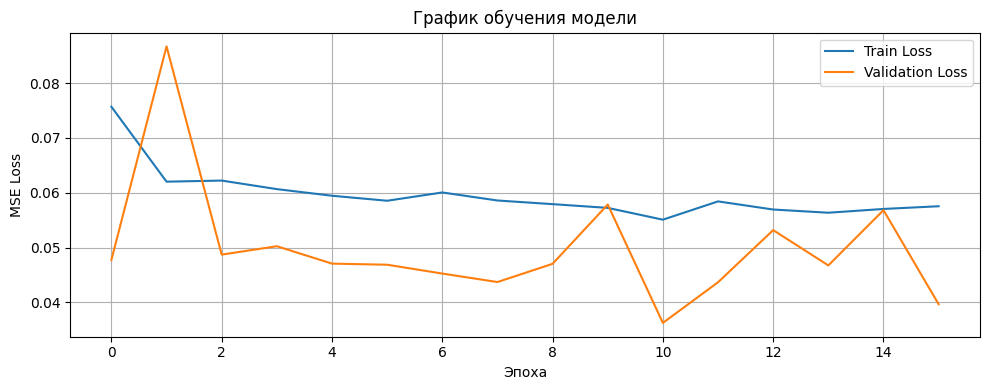

In [ ]:
# Используем остатки
data = btc[['остаток', 'дни']][:-200].copy()
data.dropna(inplace=True)

# Масштабируем остатки
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(data[['остаток']])

# Параметры
look_back = 1000
forecast_horizon = 200

# Создание обучающего набора
X, y = [], []
for i in range(len(scaled) - look_back - forecast_horizon):
    X.append(scaled[i:i + look_back])
    y.append(scaled[i + look_back:i + look_back + forecast_horizon])

X, y = np.array(X), np.array(y)

# LSTM input: [samples, timesteps, features]
print(X.shape, y.shape)

model = Sequential()
model.add(LSTM(64, input_shape=(look_back, 1)))
model.add(Dropout(0.4))
model.add(Dense(forecast_horizon))
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X, y,
    epochs=50,
    batch_size=16,
    validation_split=0.1,  # 40% данных на валидацию
    verbose=1,
    callbacks=[early_stop]
)

plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('График обучения модели')
plt.xlabel('Эпоха')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


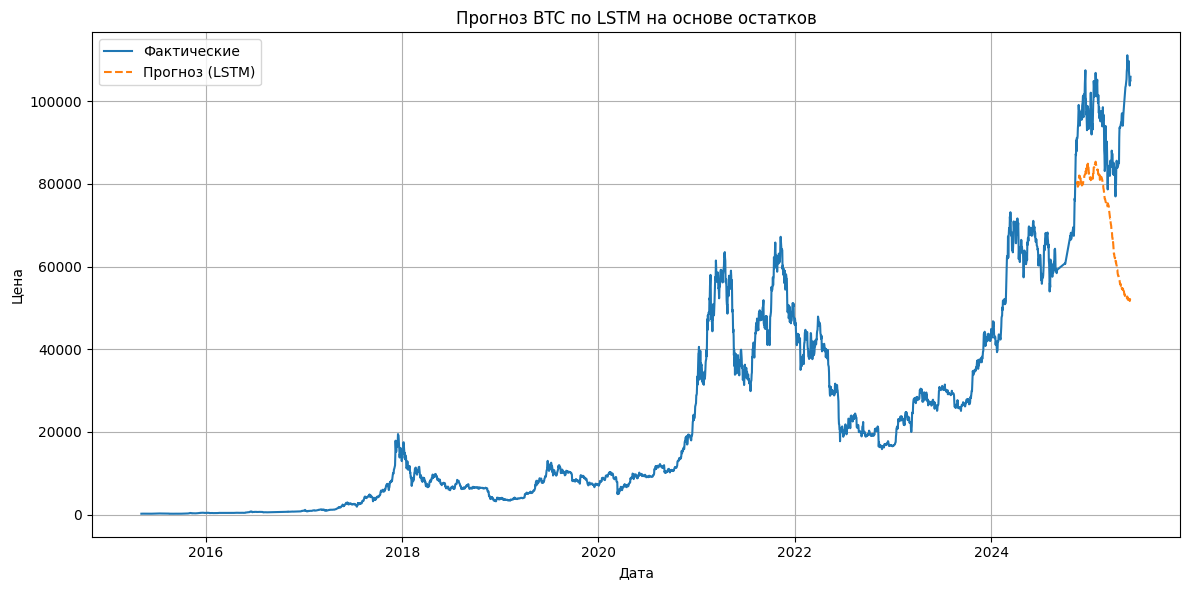

In [ ]:
# Последние 200 точек -> прогноз
last_seq = scaled[-look_back:]
last_seq = last_seq.reshape(1, look_back, 1)
forecast_scaled = model.predict(last_seq)[0]

# Обратно в оригинальный масштаб
forecast_residuals = scaler.inverse_transform(forecast_scaled.reshape(-1, 1)).flatten()

# Восстановим лог-цену и затем исходную цену
future_days = np.arange(data['дни'].max() + 1, data['дни'].max() + 1 + forecast_horizon)
future_polynom = полином(future_days)
future_ln = future_polynom + forecast_residuals
future_values = np.exp(future_ln)

# Построим график
future_dates = pd.date_range(start=btc['Дата'][:-200].max() + pd.Timedelta(days=1), periods=forecast_horizon)

plt.figure(figsize=(12,6))
plt.plot(btc['Дата'], btc['Значение'], label='Фактические')
plt.plot(future_dates, future_values, label='Прогноз (LSTM)', linestyle='--')
plt.legend()
plt.title('Прогноз BTC по LSTM на основе остатков')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.grid(True)
plt.tight_layout()
plt.show()

## Calman

In [32]:
# Путь к файлу
file_path = "/content/voting.xlsx"

# Загрузка Excel
excel_file = pd.ExcelFile(file_path)
df = excel_file.parse('Лист1')
df

,Дата,Цена закр.,"Изменение, %",Фича
0,2011-09-14,5.6193,-0.0312,0.3682
1,2011-09-15,4.8400,-0.1387,0.3920
2,2011-09-16,4.8200,-0.0041,0.3676
3,2011-09-17,4.7700,-0.0104,0.3412
4,2011-09-18,5.2000,0.0901,0.3412
...,...,...,...,...
4976,2025-04-29,94319.1700,-0.0075,0.5793
4977,2025-04-30,94219.4800,-0.0011,0.5821
4978,2025-05-01,96499.2200,0.0242,0.5590
4979,2025-05-02,96915.8800,0.0043,0.6810


In [44]:
# Применим фильтр Калмана к колонке 'Фича'
ficha = df['Фича'].values
n = len(ficha)

# Параметры фильтра Калмана
Q = 0.0001  # ковариация процесса
R = 0.01    # ковариация измерения
x_hat = np.zeros(n)
P = np.zeros(n)
K = np.zeros(n)

# Инициализация
x_hat[0] = ficha[0]
P[0] = 1

# Применение фильтра
for t in range(1, n):
    x_hat_minus = x_hat[t - 1]
    P_minus = P[t - 1] + Q

    K[t] = P_minus / (P_minus + R)
    x_hat[t] = x_hat_minus + K[t] * (ficha[t] - x_hat_minus)
    P[t] = (1 - K[t]) * P_minus

# Добавим результат в DataFrame
df['Фича_Калман'] = x_hat
df[['Дата', 'Фича', 'Изменение, %', 'Фича_Калман']]

,Дата,Фича,"Изменение, %",Фича_Калман
0,2011-09-14,0.3682,-0.0312,0.368200
1,2011-09-15,0.3920,-0.1387,0.391976
2,2011-09-16,0.3676,-0.0041,0.379734
3,2011-09-17,0.3412,-0.0104,0.366681
4,2011-09-18,0.3412,0.0901,0.360093
...,...,...,...,...
4976,2025-04-29,0.5793,-0.0075,0.451329
4977,2025-04-30,0.5821,-0.0011,0.463769
4978,2025-05-01,0.5590,0.0242,0.472828
4979,2025-05-02,0.6810,0.0043,0.492630


In [45]:
df.to_csv('voting_with_calman.csv')

In [ ]:
import numpy as np
import pandas as pd

# Убедимся, что дата в формате datetime
df['Дата'] = pd.to_datetime(df['Дата'])

ficha = df['Фича'].values
change = df['Изменение, %'].values
dates = df['Дата'].values
n = len(ficha)

# Размеры частей
valid_size = 300
test_size = 500
train_end = n - test_size - valid_size  # конец train

# Индексы для каждой части
train_idx = np.arange(0, train_end)
test_idx = np.arange(train_end, train_end + test_size)
valid_idx = np.arange(train_end + test_size, n)

# Период 2018-2023
start_date = pd.Timestamp('2018-01-01')
end_date = pd.Timestamp('2023-12-31')
mask_2018_2023 = (df['Дата'] >= start_date) & (df['Дата'] <= end_date)
indices_2018_2023 = np.where(mask_2018_2023)[0]

Q_values = np.arange(0.0001, 0.1 + 0.0005, 0.0005)
R_values = np.arange(0.01, 1 + 0.005, 0.005)

def kalman_filter(data, Q, R, x0=None, P0=1):
    n = len(data)
    x_hat = np.zeros(n)
    P = np.zeros(n)
    K = np.zeros(n)

    if x0 is None:
        x_hat[0] = data[0]
    else:
        x_hat[0] = x0
    P[0] = P0

    for t in range(1, n):
        x_hat_minus = x_hat[t - 1]
        P_minus = P[t - 1] + Q

        K[t] = P_minus / (P_minus + R)
        x_hat[t] = x_hat_minus + K[t] * (data[t] - x_hat_minus)
        P[t] = (1 - K[t]) * P_minus

    return x_hat

def calc_profit(x_hat, change_arr):
    profit = np.zeros(len(x_hat))
    for t in range(1, len(x_hat)):
        if x_hat[t] > x_hat[t - 1]:
            profit[t] = change_arr[t]
        else:
            profit[t] = -change_arr[t]
    return profit.sum()

profit_test = 0

for Q in Q_values:
    for R in R_values:
        # Train
        ficha_train = ficha[train_idx]
        change_train = change[train_idx]
        x_hat_train = kalman_filter(ficha_train, Q, R)
        profit_train = calc_profit(x_hat_train, change_train)

        # Test - инициализация фильтра из конца train
        ficha_test = ficha[test_idx]
        change_test = change[test_idx]
        x0_test = x_hat_train[-1]
        x_hat_test = kalman_filter(ficha_test, Q, R, x0=x0_test)
        new_profit_test = calc_profit(x_hat_test, change_test)

        # Valid - инициализация из конца test
        ficha_valid = ficha[valid_idx]
        change_valid = change[valid_idx]
        x0_valid = x_hat_test[-1]
        x_hat_valid = kalman_filter(ficha_valid, Q, R, x0=x0_valid)
        profit_valid = calc_profit(x_hat_valid, change_valid)

        # 2018-2023 период
        if len(indices_2018_2023) > 1:
            ficha_18_23 = ficha[indices_2018_2023]
            change_18_23 = change[indices_2018_2023]
            x_hat_18_23 = kalman_filter(ficha_18_23, Q, R)
            profit_18_23 = calc_profit(x_hat_18_23, change_18_23)
        else:
            profit_18_23 = np.nan

        if new_profit_test > profit_test:
            print(f"Q={Q:.5f}, R={R:.5f}, Train profit={profit_train:.6f}, Test profit={profit_test:.6f}, Valid profit={profit_valid:.6f}, 2018-2023 profit={profit_18_23:.6f}")
            profit_test = new_profit_test